In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import numpy as np


In [74]:
file_path = "UKElectricity.csv"
df = pd.read_csv(file_path, index_col=0, parse_dates=True)


In [75]:
df_info = df.info()
df_head = df.head()
df_info, df_head


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43391 entries, 2023-01-01 00:00:00 to 2024-07-01 23:30:00
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              43391 non-null  float64
 1   Volume             43391 non-null  float64
 2   Settlement Period  43391 non-null  int64  
 3   hour               43391 non-null  int64  
 4   quarter            43391 non-null  int64  
 5   year               43391 non-null  int64  
 6   dayofyear          43391 non-null  int64  
 7   dayofmonth         43391 non-null  int64  
 8   weekofyear         43391 non-null  int64  
 9   SAP                43391 non-null  float64
 10  EU_ETS             43391 non-null  float64
 11  Gas                43391 non-null  float64
 12  INDO               43391 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 4.6 MB


(None,
                      Price  Volume  Settlement Period  hour  quarter  year  \
 datetime                                                                     
 2023-01-01 00:00:00  48.90  605.00                  1     0        1  2023   
 2023-01-01 00:30:00  49.13  759.15                  2     0        1  2023   
 2023-01-01 01:00:00  45.62  659.35                  3     1        1  2023   
 2023-01-01 01:30:00  47.05  612.65                  4     1        1  2023   
 2023-01-01 02:00:00  46.83  699.15                  5     2        1  2023   
 
                      dayofyear  dayofmonth  weekofyear    SAP    EU_ETS  \
 datetime                                                                  
 2023-01-01 00:00:00          1           1          52  16.95  1.033832   
 2023-01-01 00:30:00          1           1          52  16.95  1.033832   
 2023-01-01 01:00:00          1           1          52  16.95  1.033832   
 2023-01-01 01:30:00          1           1          52  1

In [76]:
missing_values = df.isnull().sum()
missing_values

,0
Price,0
Volume,0
Settlement Period,0
hour,0
quarter,0
year,0
dayofyear,0
dayofmonth,0
weekofyear,0
SAP,0


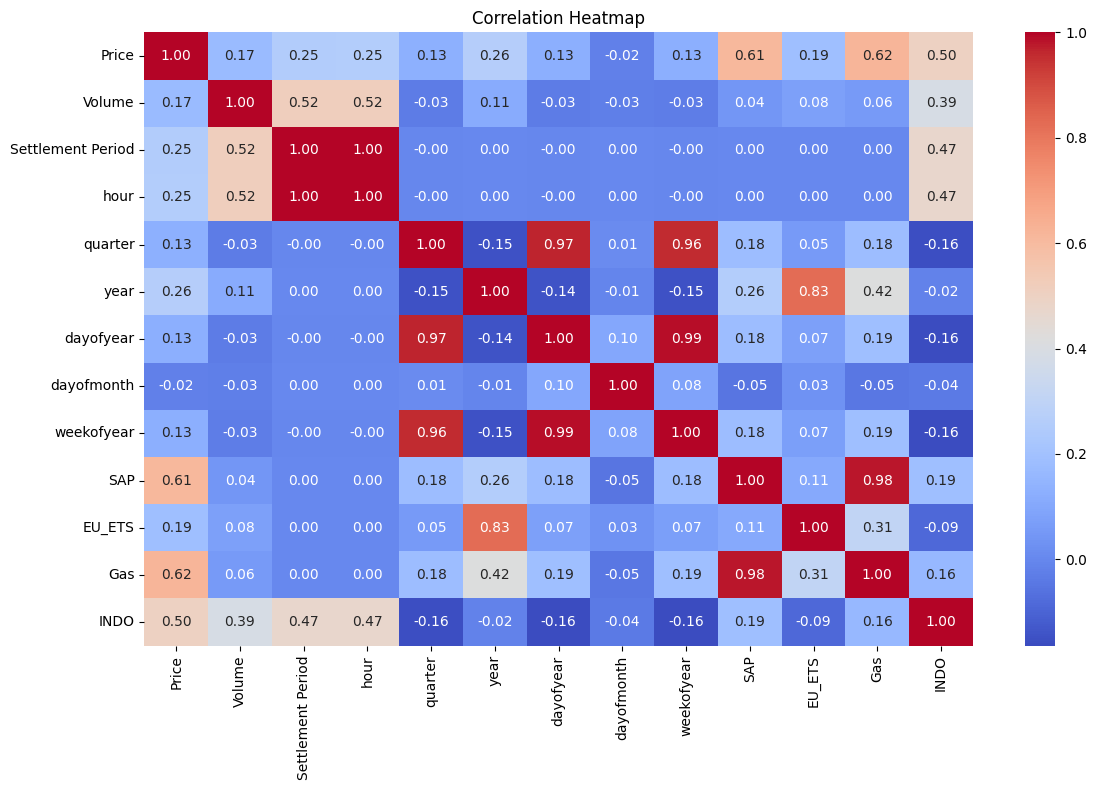

In [77]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [78]:
X = df.drop(columns=["Price"])
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((34712, 12), (8679, 12))

In [79]:
# Train the XGBoost Regressor
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [80]:
y_pred = xgb_model.predict(X_test)

In [81]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

mse, mae, rmse, mape, r2


(37.22210968682809,
 3.826507309174837,
 np.float64(6.100992516535985),
 np.float64(10.582033513704076),
 0.8636885778531951)

In [82]:
print(f"MSE  : {float(mse):.4f}")
print(f"MAE  : {float(mae):.4f}")
print(f"RMSE : {float(rmse):.4f}")
print(f"MAPE : {float(mape):.4f}")
print(f"R²   : {float(r2):.4f}")


MSE  : 37.2221
MAE  : 3.8265
RMSE : 6.1010
MAPE : 10.5820
R²   : 0.8637


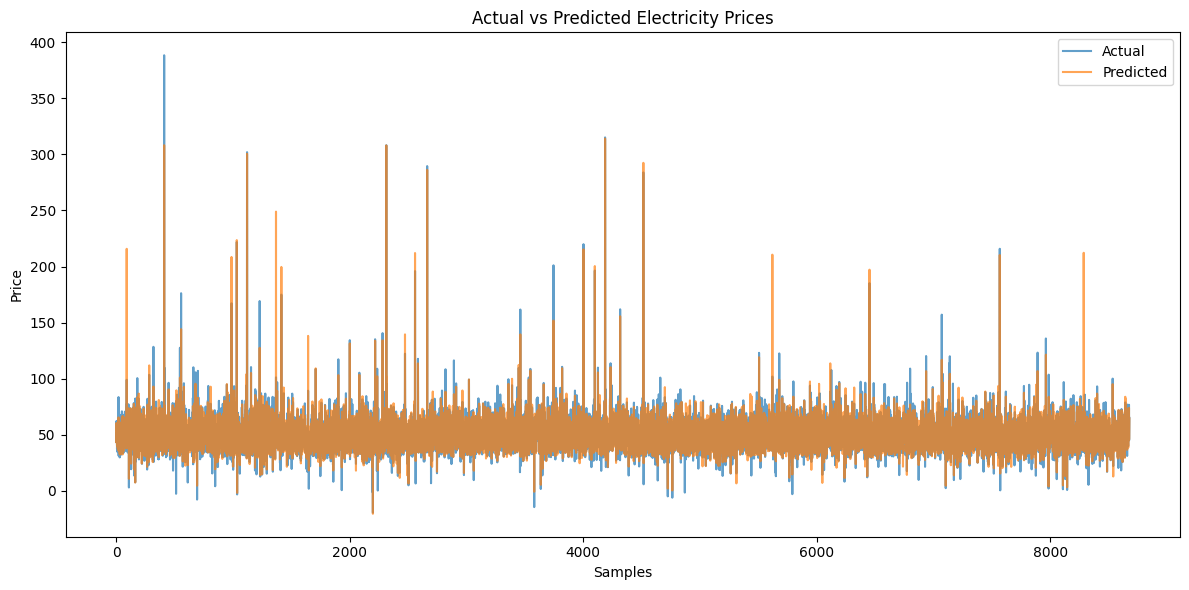

In [83]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.title("Actual vs Predicted Electricity Prices")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


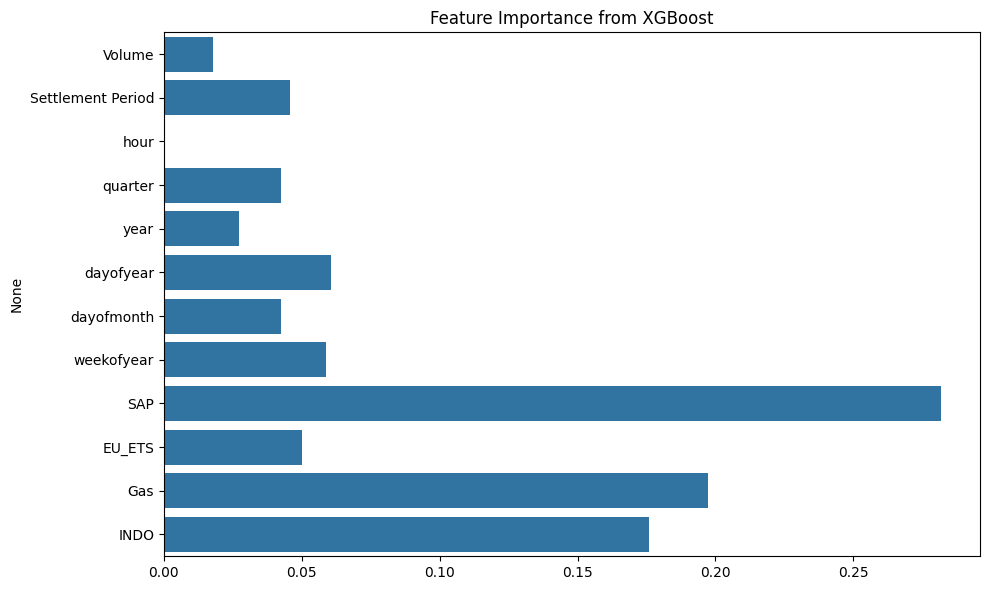

In [84]:
# Feature importance from XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title("Feature Importance from XGBoost")
plt.tight_layout()
plt.show()